# **[ Building Classification Models with Scikit-learn ]**


## **프로젝트 요약**

> 본 프로젝트는 Scikit-learn 패키지를 활용하여 다양한 분류모델을 구현하고 성능을 평가한 후 최종적으로는 최적의 모델을 선정하는 것을 목표로 한다. 
<br>
이를 위해 sklearn패키지에서 제공하는 분류용 예제 데이터셋인 손글씨숫자데이터, 와인데이터, 유방암진단데이터 를 사용하였다.
<br>
각 프로젝트는 ~~~~단계로 이루어져있다.(수행하였다)
<br>
손글씨 프로젝트 결과(데이터셋소개-전처리-모델링-평가)
<br>
와인 프로젝트 결과
<br>
유방암 프로젝트 결과
<br>
회고 **적기**

## **목차**
- [**1. 손글씨 이미지 분류**](#--1-------------)
  * [**1-0. 문제 정의**](#1-0-문제-정의)
  * [**1-1. 데이터 불러오기**](#1-1.-데이터-불러오기)
  * [**1-2. 탐색적 데이터 분석 및 전처리**](#--1-2--------------------)
  * [**1-3. 피쳐 엔지니어링**](#--1-3-----------)
  * [**1-4. 모델 구현 및 평가**](#--1-4-------------)



## **0. 사전정의**
---

In [107]:
############################################## 라이브러리 불러오기 #####################################################

import numpy as np
import pandas as pd
import platform
import random
import warnings
warnings.filterwarnings(action = "ignore")

# 시각화
import matplotlib as mpl  # 기본 설정 만지는 용도
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
%matplotlib inline

if platform.system() == 'Darwin': #맥
    plt.rc('font', family='AppleGothic') 
elif platform.system() == 'Windows': #윈도우
    plt.rc('font', family='Malgun Gothic') 
elif platform.system() == 'Linux': #리눅스 (구글 코랩)    

    ! sudo apt-get update -qq
    ! sudo apt-get install fonts-nanum* -qq #나눔글꼴 설치
    ! sudo fc-cache -fv #폰트캐시 삭제

    # 나눔글꼴 matplotlib에 복사 (파이썬 버전 확인하는것 중요 !)
    ! sudo cp /usr/share/fonts/truetype/nanum/Nanum* /usr/local/lib/python3.7/dist-packages/matplotlib/mpl-data/fonts/ttf/
    # matplotlib 캐시삭제
    try:
      ! rm -rf /content/.cache/matplotlib/* #colab
    except:
      ! rm -rf /home/ubuntu/.cache/matplotlib/* #ubuntu


    sys_font=fm.findSystemFonts()
    nanum_font = [f for f in sys_font if 'NanumGothicCoding.ttf' in f][0]
    font_name = fm.FontProperties(fname=nanum_font, size=10).get_name()
    plt.rc('font', family=font_name)


plt.rcParams['axes.unicode_minus'] = False 
# fm._rebuild()

# 데이터셋 
from sklearn.datasets import load_digits
from sklearn.datasets import load_wine 
from sklearn.datasets import load_breast_cancer

# 학습데이터분리, 교차검증
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# ml 알고리즘 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm 
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression


# 모델 성능 평가 지표 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix # 혼동행렬
from sklearn.metrics import accuracy_score # 정확도
from sklearn.metrics import precision_score # 정밀도
from sklearn.metrics import recall_score # 민감도(재현율)
from sklearn.metrics import f1_score # F1 스코어 
from sklearn.metrics import roc_auc_score

# 모델 파이프라인
from sklearn.pipeline import make_pipeline


W: GPG error: https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease: The following signatures couldn't be verified because the public key is not available: NO_PUBKEY A4B469963BF863CC
E: The repository 'https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease' is no longer signed.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 31 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directo

## **1. 손글씨 이미지 분류** <a class="anchor" id="chapter1"></a> 
---


### **1-0. 문제 정의**
----

#### **1-0.1. 프로젝트 목표**  
<div>
본 프로젝트는 손글씨 이미지가 주어졌을 때, 해당 이미지가 어떤 숫자에 해당하는지를 예측하는 모델을 Scikit-learn을 활용하여 구현하는 것을 목표로 한다. 

<br> 

<img src='./src/img/digits_img.jpeg'></img>

<br>
위 사진을 보면 같은 숫자인데도 글씨에 따라서 
</div>

<br> 
#### **1-0.2. 분석 데이터 정의** 
<div> 
데이터는 sklearn.dataset 안에 빌트인 데이터셋으로 제공하는 손글씨 데이터셋을 사용한다. 
해당 데이터셋은 sklearn.utils.Bunch 라는 자료구조를 활용하는데, key-value 형식으로 구성되어 있으며, 딕셔너리 타입과 유사한 구조를 가지고 있다. 
<br>
데이터셋의 세부적인 구성은 아래 표에서 확인할 수 있다. 
<br>
</br>

| 속성 | 설명 |
| --- | --- |
| data | 샘플데이터, 평명화된 (1797, 64) 크기의 ndarray  |
| images | (1797, 8,8) 크기의 ndarray  |
| target | label 데이터, (1797, ) 크기의 ndarray  |
| feature_names | Feature 데이터 이름 |
| target_names | Label 데이터 이름 |
| DESCR | 데이터 세트에 대한 전체 설명 |

</div> 
<br> 

#### **1-0.3. 모델링 task 정의**  
<div> 

컴퓨터는 이미지를 색을 나타내는 숫자의 배열로 인식한다. 해당 데이터셋에는 숫자들의 배열로 이루어진 image와 data 데이터가 있고, 이미지가 어떤 숫자인지를 나타내는 target 데이터가 존재한다. 이번 예제에서는 학습할 데이터와 정답지가 존재하기에 `지도학습` 방법을 사용할 것이다. 그중에서도 data 또는 image의 배열값으로 어떤 숫자를 가리키는지를 예측해야하기에 `분류` 모델을 활용한다.




### **1-1. 데이터 불러오기**
----

In [108]:
############################## 데이터 로드 & 확인 ##############################

digits = load_digits()
digits_data = digits.data
digits_image = digits.images
digits_label = digits.target
digits_df = pd.DataFrame(data=digits_data, columns=digits.feature_names)
digits_df['label'] =  digits.target
print("################################ 데이터 설명 ##############################\n")
print(digits.DESCR)

print("\n############################## 데이터 확인 ##############################\n")
print(f' *샘플데이터 크기 : {digits_data.shape}')
print(f' *이미지데이터 크기 : {digits_image.shape}')
print(f' *정답데이터 크기 : {digits_label.shape}')

print("\n############################## 데이터프레임 확인 ###########################\n")

digits_df.head()

################################ 데이터 설명 ##############################

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverl

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,label
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


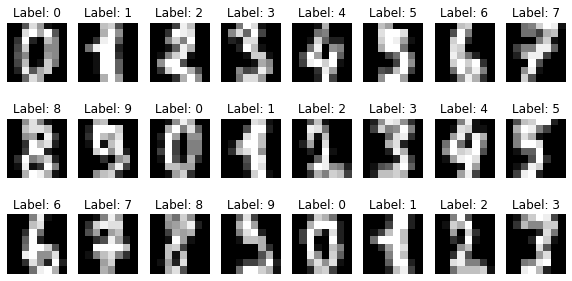

In [109]:
############################## 손글씨 이미지 확인 ##############################
fig, axes = plt.subplots(nrows=3, ncols=8, figsize=(10,5))
for ax, image, label in zip(axes.flat, digits_image, digits_label):
    ax.set_axis_off()
    ax.imshow(image, cmap="gray")
    ax.set_title(f"Label: {label}" )

### **1-2. 탐색적 데이터 분석 및 전처리**


#### 1-2-1. 데이터 타입 확인

In [110]:
############################## 컬럼별 데이터 타입확인 ##############################
digits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 65 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pixel_0_0  1797 non-null   float64
 1   pixel_0_1  1797 non-null   float64
 2   pixel_0_2  1797 non-null   float64
 3   pixel_0_3  1797 non-null   float64
 4   pixel_0_4  1797 non-null   float64
 5   pixel_0_5  1797 non-null   float64
 6   pixel_0_6  1797 non-null   float64
 7   pixel_0_7  1797 non-null   float64
 8   pixel_1_0  1797 non-null   float64
 9   pixel_1_1  1797 non-null   float64
 10  pixel_1_2  1797 non-null   float64
 11  pixel_1_3  1797 non-null   float64
 12  pixel_1_4  1797 non-null   float64
 13  pixel_1_5  1797 non-null   float64
 14  pixel_1_6  1797 non-null   float64
 15  pixel_1_7  1797 non-null   float64
 16  pixel_2_0  1797 non-null   float64
 17  pixel_2_1  1797 non-null   float64
 18  pixel_2_2  1797 non-null   float64
 19  pixel_2_3  1797 non-null   float64
 20  pixel_2_

모두 숫자로 이루어진 데이터인걸 알 수 있다.


#### 1-2-2. 통계값 확인

In [111]:
############################## 컬럼별 간단한 통계값 확인 ##############################
digits_df.describe()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,label
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496,4.490818
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122,2.865304
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000,2.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000,4.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000,7.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,9.000000


#### 1-2-3. 결측값 확인

In [112]:
############################## 결측여부 확인 ##############################
digits_df.isnull().any().any()

False

#### 1-2-4. 중복값 확인

In [113]:
############################## 중복된 항목 수 확인 ##############################
print("중복된 항목 수 :", len(digits_df[digits_df.duplicated()])) 

중복된 항목 수 : 0


#### 1-2-5. target feature 확인

In [114]:
############################## target feature 확인 ##############################
print("target feature의 class확인 :", digits.target_names) 


target feature의 class확인 : [0 1 2 3 4 5 6 7 8 9]


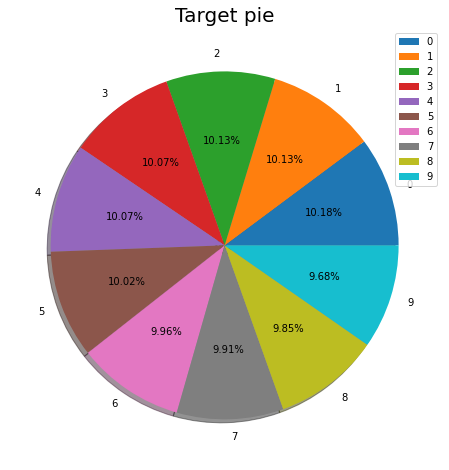

In [115]:
############################## target class 분포 확인 ##############################

labels = digits.target_names
size = digits_df['label'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(size, labels =labels, autopct = "%.2f%%", shadow = True)
plt.axis('off')
plt.title('Target pie', fontsize = 20)
plt.legend()



<div>
파이차트를 그려본 결과, 클래스의 분포가 균일한것을 알 수 있다. 데이터 분포가 불균형한 경우에는 과적합의 문제가 발생할 수 있어서 샘플링(Under Sampling, Over Sampling) 등의 방법을 이용하여 해결을 하지만, 현재의 경우에는 매우 균일하게 분포가 되어있어서 샘플링 과정은 생략하도록 한다.
</div>

#### 1-2-6. feature(독립변수) 확인&정제 

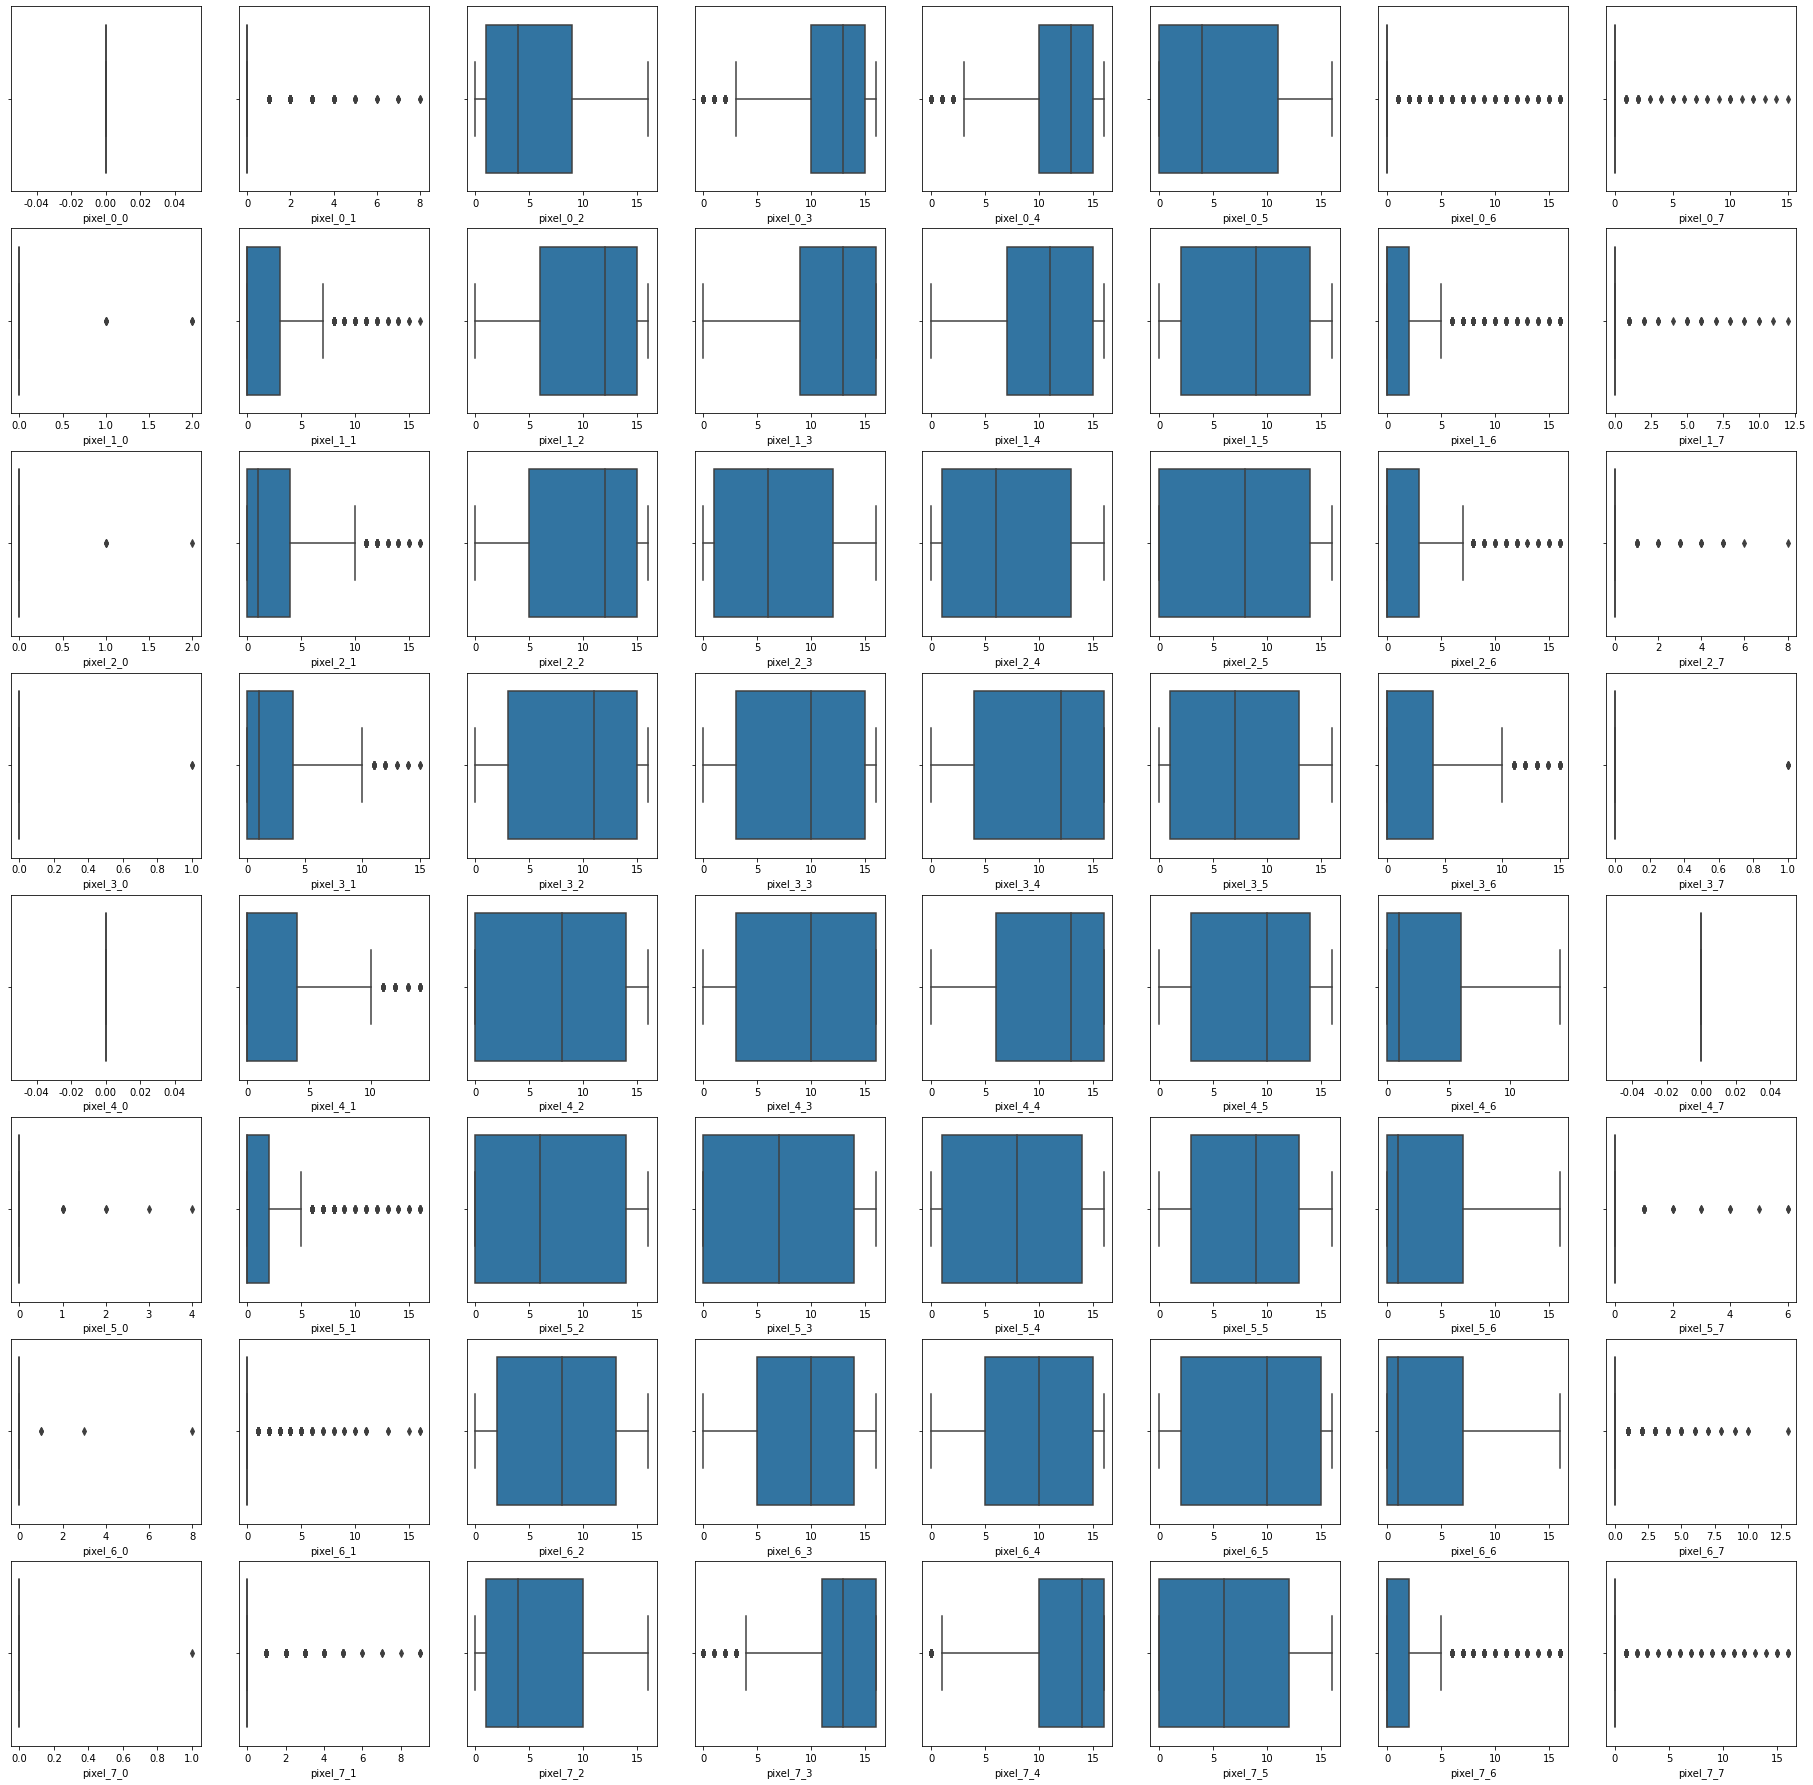

In [116]:
############################## 정규화 이전 feature scale확인 ##############################
warnings.simplefilter(action='ignore', category=FutureWarning) # FutureWarning 제거
plt.figure(figsize=(32, 32))
icount =1
for col in digits.feature_names:
    plt.subplot(8,8, icount)
    sns.boxplot(digits_df[col], orient="v")
    icount = icount+1
plt.show()

In [117]:
############################## 정제 전 feature 최대,최소 ##############################
min = digits_df.drop('label', axis=1).describe().T['min'].min()
max = digits_df.drop('label', axis=1).describe().T['max'].max()
print(f' *feature 최솟값 : {min}')
print(f' *feature 최댓값 : {max}')

 *feature 최솟값 : 0.0
 *feature 최댓값 : 16.0


In [118]:
############################## 데이터 정규화 ##############################
digits_data_scaled = digits_data / 16
digits_df_scaled = pd.DataFrame(data=digits_data_scaled, columns=digits.feature_names)
digits_df_scaled['label'] =  digits.target
min_scaled = digits_df_scaled.drop('label', axis=1).describe().T['min'].min()
max_scaled = digits_df_scaled.drop('label', axis=1).describe().T['max'].max()
print(f' *feature 정규화 후 최솟값 : {min_scaled}')
print(f' *feature 정규화 후 최댓값 : {max_scaled}')

 *feature 정규화 후 최솟값 : 0.0
 *feature 정규화 후 최댓값 : 1.0


/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py

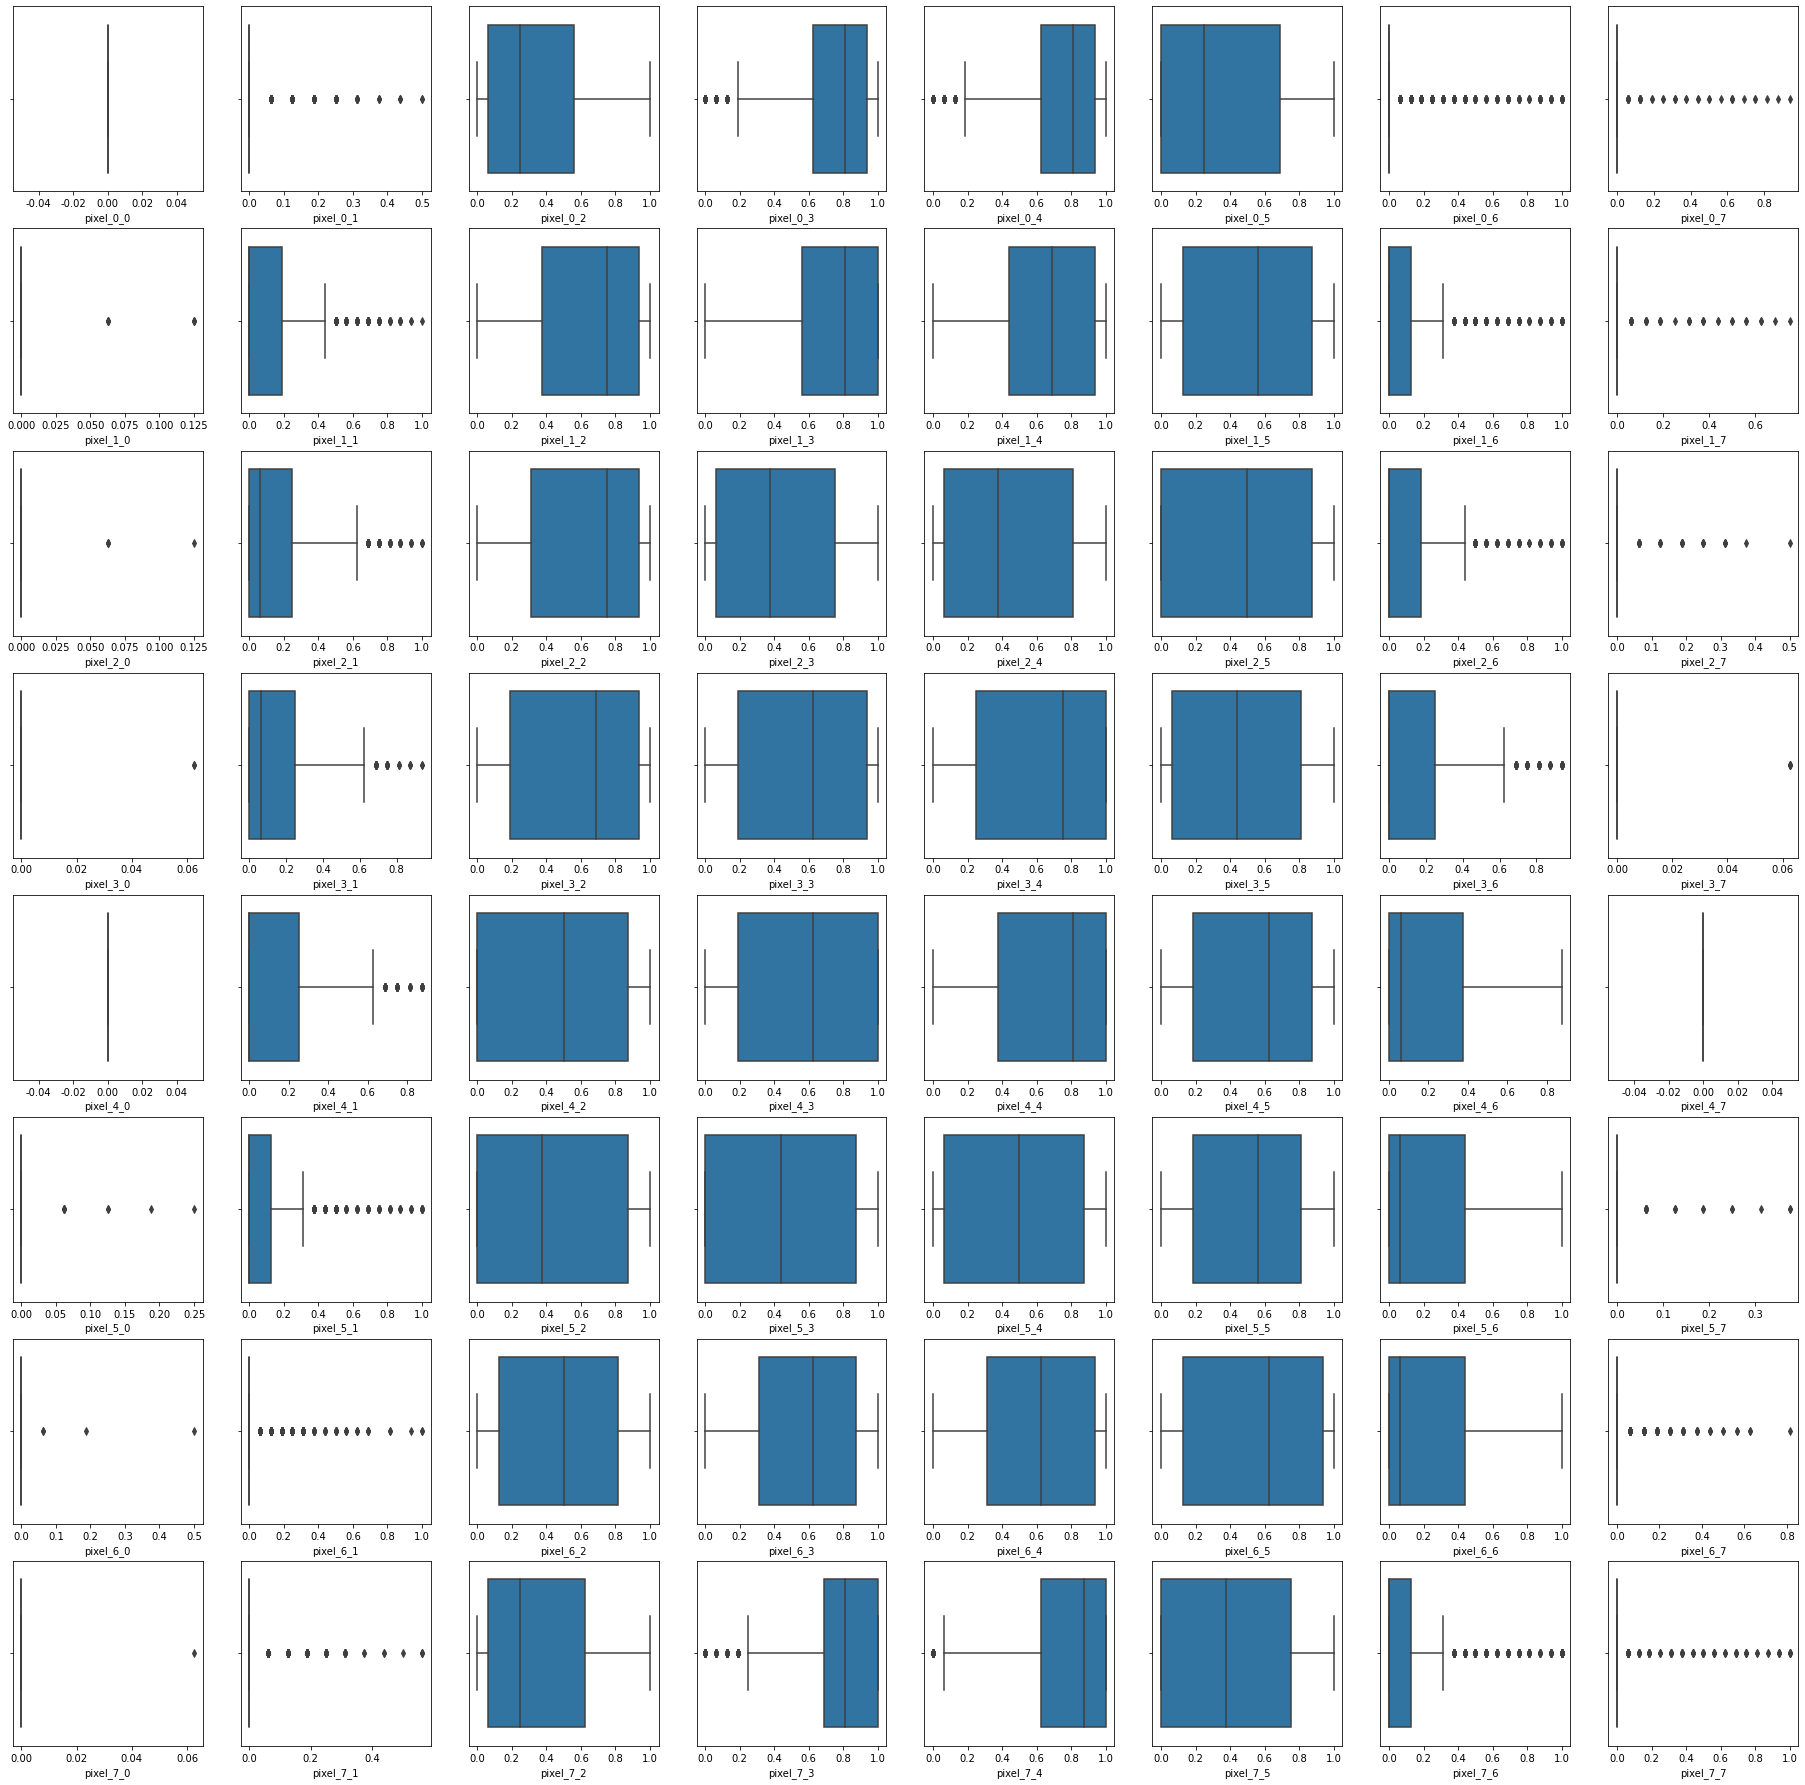

In [119]:
############################## 정규화 이후 feature scale확인 ##############################
warnings.simplefilter('always', category=UserWarning)
plt.figure(figsize=(32, 32))
icount =1
for col in digits_df_scaled.columns[:-1]:
    plt.subplot(8,8, icount)
    sns.boxplot(digits_df_scaled[col], orient="v")
    icount = icount+1
plt.show()

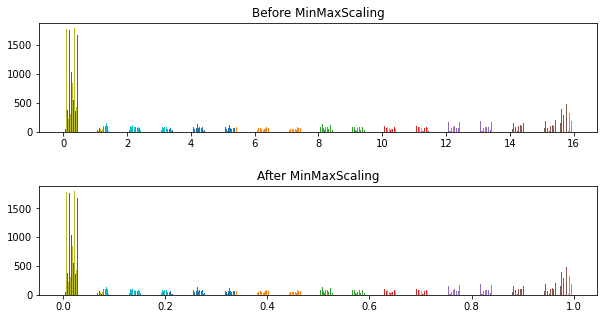

In [120]:
plt.figure(figsize=(10,5))
plt.subplot(2, 1, 1)
plt.hist(digits_data, bins=32)
plt.title('Before MinMaxScaling')
plt.subplot(2, 1, 2)
plt.hist(digits_data_scaled, bins=32)
plt.title('After MinMaxScaling')
plt.subplots_adjust(hspace=0.5)


<div>
독립변수들이 가지는 데이터의 상대적 크기 차이를 없애기 위해서 정규화 과정을 진행하도록 한다. 정규화는 feature를 0~1 사이 값으로 통일시캬줄때 사용을 하는 것인데, 보통 MinMaxScaling을 가장 많이 사용한다. 해당 데이터는 최솟값이 0이고 최댓값이 16이므로 16으로 나눠주었다.
</div>

### **1-4. 모델 구현 및 평가**
- 예측 모델 학습
- 모델 성능 개선
- 성능 평가
- 최종 모델 선정

#### **1-4-1. train/test 나누기**


In [121]:
############################## 학습데이터 나누기 & 교차검증 ##############################

X = digits_data_scaled
y = digits_label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)


#### **1-4-2. 모델 학습 및 예측**

In [156]:
############################## DecisionTreeClassifier 학습 ##############################
decision_tree = DecisionTreeClassifier(random_state=32)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        27
           1       0.76      0.78      0.77        40
           2       0.87      0.80      0.84        41
           3       0.85      0.79      0.82        43
           4       0.87      0.82      0.84        33
           5       0.86      0.83      0.85        30
           6       0.90      0.90      0.90        29
           7       0.88      0.84      0.86        45
           8       0.64      0.79      0.71        29
           9       0.76      0.81      0.79        43

    accuracy                           0.83       360
   macro avg       0.84      0.83      0.83       360
weighted avg       0.83      0.83      0.83       360



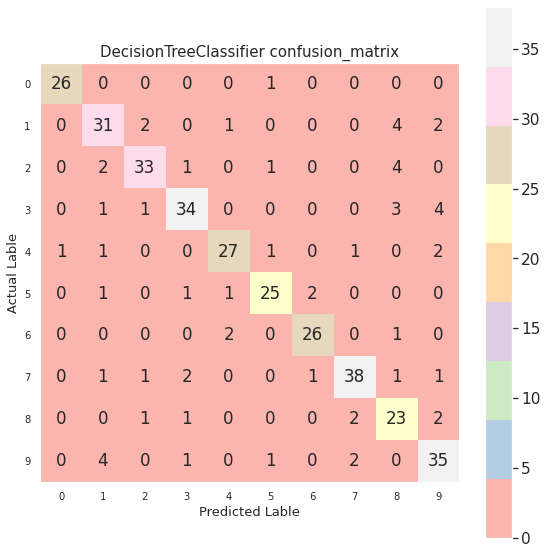

In [158]:
######################### DecisionTreeClassifier confusion_matrix #######################
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,8))
plt.imshow(cm, interpolation='nearest', cmap='Pastel1')
plt.title('DecisionTreeClassifier confusion_matrix', size=15)
plt.colorbar()
tick_marks = np.arange(10) 
plt.xticks(tick_marks,
           ["0","1","2","3","4","5","6","7","8","9"],
           size = 10)
plt.yticks(tick_marks,
           ["0","1","2","3","4","5","6","7","8","9"],
           size = 10)
plt.tight_layout()
plt.xlabel("Predicted Lable",size=13)
plt.ylabel("Actual Lable", size =13)
width, height = cm.shape

for x in range(width):
 for y in range(height):
    plt.annotate(str(cm[x][y]),xy=(y,x),
                horizontalalignment = 'center',
                verticalalignment = 'center')


  

In [159]:
############################## RandomForestClassifier ##############################
random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.97      0.97      0.97        40
           2       0.98      1.00      0.99        41
           3       1.00      0.98      0.99        43
           4       0.97      0.94      0.95        33
           5       0.97      0.97      0.97        30
           6       0.97      0.97      0.97        29
           7       0.98      0.96      0.97        45
           8       1.00      0.97      0.98        29
           9       0.93      1.00      0.97        43

    accuracy                           0.97       360
   macro avg       0.98      0.97      0.98       360
weighted avg       0.98      0.97      0.98       360



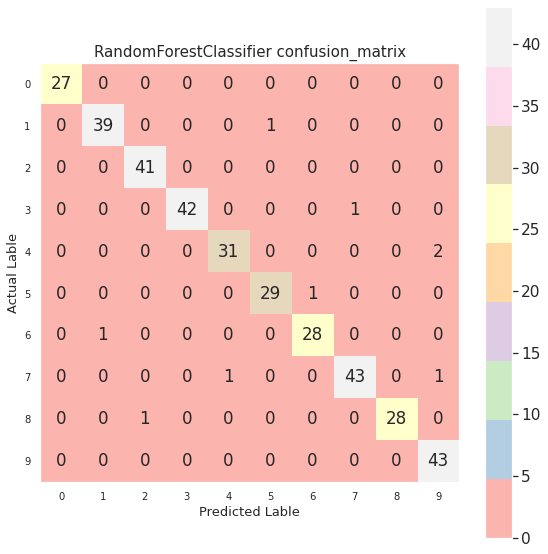

In [160]:
######################### RandomForestClassifier confusion_matrix #######################
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,8))
plt.imshow(cm, interpolation='nearest', cmap='Pastel1')
plt.title('RandomForestClassifier confusion_matrix', size=15)
plt.colorbar()
tick_marks = np.arange(10) 
plt.xticks(tick_marks,
           ["0","1","2","3","4","5","6","7","8","9"],
           size = 10)
plt.yticks(tick_marks,
           ["0","1","2","3","4","5","6","7","8","9"],
           size = 10)
plt.tight_layout()
plt.xlabel("Predicted Lable",size=13)
plt.ylabel("Actual Lable", size =13)
width, height = cm.shape

for x in range(width):
 for y in range(height):
    plt.annotate(str(cm[x][y]),xy=(y,x),
                horizontalalignment = 'center',
                verticalalignment = 'center')


  

In [166]:
############################## SupportVectorMachine ##############################
svc = svm.SVC(random_state=32)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

print(classification_report(y_test, y_pred))

정확도: 0.99
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.98      1.00      0.99        40
           2       1.00      1.00      1.00        41
           3       1.00      1.00      1.00        43
           4       1.00      1.00      1.00        33
           5       1.00      0.97      0.98        30
           6       0.97      1.00      0.98        29
           7       1.00      0.98      0.99        45
           8       1.00      0.93      0.96        29
           9       0.96      1.00      0.98        43

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



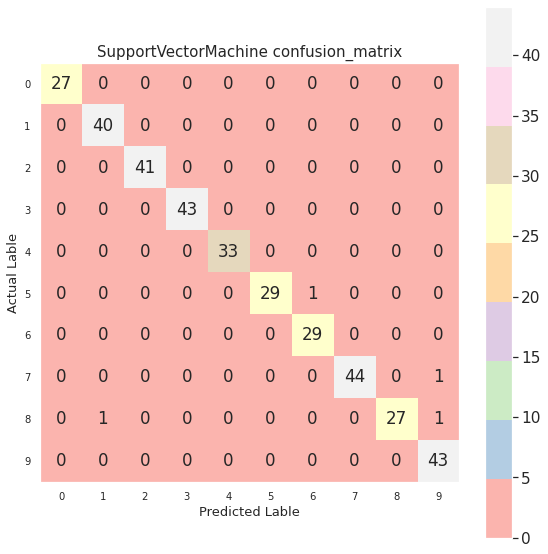

In [162]:
######################### SupportVectorMachine confusion_matrix #######################
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,8))
plt.imshow(cm, interpolation='nearest', cmap='Pastel1')
plt.title('SupportVectorMachine confusion_matrix', size=15)
plt.colorbar()
tick_marks = np.arange(10) 
plt.xticks(tick_marks,
           ["0","1","2","3","4","5","6","7","8","9"],
           size = 10)
plt.yticks(tick_marks,
           ["0","1","2","3","4","5","6","7","8","9"],
           size = 10)
plt.tight_layout()
plt.xlabel("Predicted Lable",size=13)
plt.ylabel("Actual Lable", size =13)
width, height = cm.shape

for x in range(width):
 for y in range(height):
    plt.annotate(str(cm[x][y]),xy=(y,x),
                horizontalalignment = 'center',
                verticalalignment = 'center')


  

In [130]:
############################## StochasticGradientDescent ##############################
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      0.88      0.93        40
           2       0.95      1.00      0.98        41
           3       0.97      0.91      0.94        43
           4       1.00      1.00      1.00        33
           5       0.83      0.97      0.89        30
           6       0.94      1.00      0.97        29
           7       0.93      0.91      0.92        45
           8       0.93      0.93      0.93        29
           9       0.98      0.98      0.98        43

    accuracy                           0.95       360
   macro avg       0.95      0.96      0.95       360
weighted avg       0.96      0.95      0.95       360



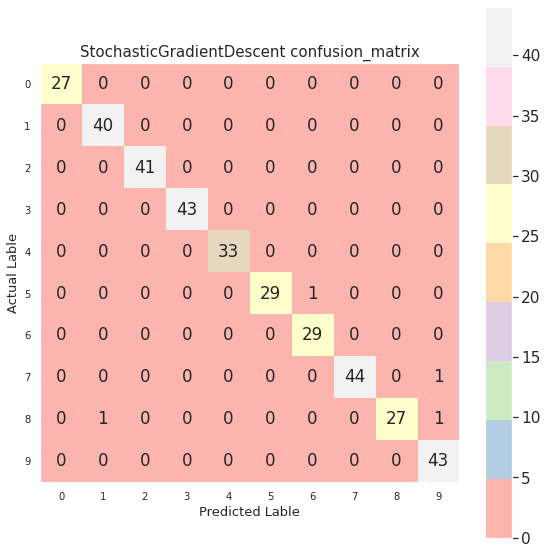

In [163]:
######################### StochasticGradientDescent confusion_matrix #######################
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,8))
plt.imshow(cm, interpolation='nearest', cmap='Pastel1')
plt.title('StochasticGradientDescent confusion_matrix', size=15)
plt.colorbar()
tick_marks = np.arange(10) 
plt.xticks(tick_marks,
           ["0","1","2","3","4","5","6","7","8","9"],
           size = 10)
plt.yticks(tick_marks,
           ["0","1","2","3","4","5","6","7","8","9"],
           size = 10)
plt.tight_layout()
plt.xlabel("Predicted Lable",size=13)
plt.ylabel("Actual Lable", size =13)
width, height = cm.shape

for x in range(width):
 for y in range(height):
    plt.annotate(str(cm[x][y]),xy=(y,x),
                horizontalalignment = 'center',
                verticalalignment = 'center')


  

In [164]:
############################## LogisticRegression ##############################
logit_reg = LogisticRegression(solver='liblinear')
logit_reg.fit(X_train, y_train)
y_pred = sgd.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      0.88      0.93        40
           2       0.95      1.00      0.98        41
           3       0.97      0.91      0.94        43
           4       1.00      1.00      1.00        33
           5       0.83      0.97      0.89        30
           6       0.94      1.00      0.97        29
           7       0.93      0.91      0.92        45
           8       0.93      0.93      0.93        29
           9       0.98      0.98      0.98        43

    accuracy                           0.95       360
   macro avg       0.95      0.96      0.95       360
weighted avg       0.96      0.95      0.95       360



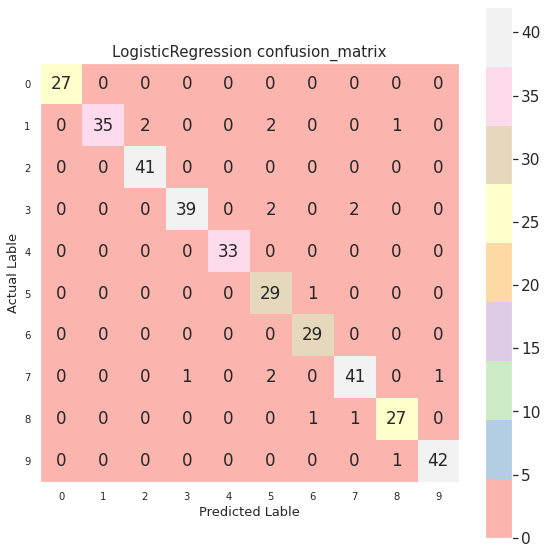

In [165]:
######################### LogisticRegression confusion_matrix #######################
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,8))
plt.imshow(cm, interpolation='nearest', cmap='Pastel1')
plt.title('LogisticRegression confusion_matrix', size=15)
plt.colorbar()
tick_marks = np.arange(10) 
plt.xticks(tick_marks,
           ["0","1","2","3","4","5","6","7","8","9"],
           size = 10)
plt.yticks(tick_marks,
           ["0","1","2","3","4","5","6","7","8","9"],
           size = 10)
plt.tight_layout()
plt.xlabel("Predicted Lable",size=13)
plt.ylabel("Actual Lable", size =13)
width, height = cm.shape

for x in range(width):
 for y in range(height):
    plt.annotate(str(cm[x][y]),xy=(y,x),
                horizontalalignment = 'center',
                verticalalignment = 'center')


  

#### **1-4-3. 모델 성능 평가**

<div>
 모델학습후 확인한 confusion matrix에서 데이터가 0 ~ 9 사이에 고르게 분포한 편이라는 걸 알 수 있는데, 일반적으로 클래스가 균일하지 못한 경우에는 accuracy 외에 다른 평가지표도 고려해야하지만 해당 경우는 클래스가 균일하기 때문에 성능평가지표로는 `정확도(accuracy)`를 사용한다.

<br>
평가지표를 정확도로 기준으로 `SVM`이 성능이 제일 좋으므로 모델은 해당프로젝트에서는 SVM 모델을 채택하기로 한다. 


## **2. 와인등급 분류** 
---


### **2-0. 문제 정의**
----

#### **2-0.1. 프로젝트 목표**  
<div>
본 프로젝트는 와인과 관련된 특성이 주어졌을 때 와인의 등급을 예측하는 모델을 Scikit-learn을 활용하여 구현하는 것을 목표로 한다. 


<br> 
#### **2-0.2. 분석 데이터 정의** 
<div> 
데이터는 sklearn.dataset 안에 빌트인 데이터셋으로 제공하는 와인 데이터셋을 사용한다. 
해당 데이터셋은 sklearn.utils.Bunch 라는 자료구조를 활용하는데, key-value 형식으로 구성되어 있으며, 딕셔너리 타입과 유사한 구조를 가지고 있다. 
<br>
데이터셋의 세부적인 구성은 아래 표에서 확인할 수 있다. 
<br>
</br>

| 속성 | 설명 |
| --- | --- |
| data | 샘플데이터, (178, 13) 크기의 ndarray  |
| target | label 데이터, (1797, ) 크기의 ndarray  |
| feature_names | Feature 데이터 이름 |
| target_names | Label 데이터 이름 |
| DESCR | 데이터 세트에 대한 전체 설명 |

</div> 
<br> 

#### **2-0.3. 모델링 task 정의**  
<div> 
와인의 정보가 담긴 data 데이터가 있고, 해당 와인의 등급을 나타내는 target 데이터가 존재한다. 이번 예제에서는 학습할 데이터와 정답지가 존재하기에 `지도학습` 방법을 사용할 것이다. 그중에서도 data 12가지 정보가 담긴 정보를 통해 등급을 예측해야하기에 `분류` 모델을 활용한다.




### **2-1. 데이터 불러오기**
----

In [176]:
############################## 데이터 로드 & 확인 ##############################

wine = load_wine()
wine_data = wine.data
wine_label = wine.target
wine_df = pd.DataFrame(data=wine_data, columns=wine.feature_names)
wine_df['label'] =  wine.target


print("################################ 데이터 설명 ##############################\n")
print(wine.DESCR)

print("\n############################## 데이터 확인 ##############################\n")
print(f' *샘플데이터 크기 : {wine_data.shape}')
print(f' *정답데이터 크기 : {wine_label.shape}')

print("\n############################## 데이터프레임 확인 ###########################\n")

wine_df.head()

################################ 데이터 설명 ##############################

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:              

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


### **2-2. 탐색적 데이터 분석 및 전처리**


#### **2-2-1. 데이터 타입 확인**

In [177]:
############################## 컬럼별 데이터 타입확인 ##############################
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  label

모두 숫자로 이루어진 데이터인걸 알 수 있다.


#### **2-2-2. 통계값 확인**

In [178]:
############################## 컬럼별 간단한 통계값 확인 ##############################
wine_df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


#### **2-2-3. 결측값 확인**

In [179]:
############################## 결측여부 확인 ##############################
wine_df.isnull().any().any()

False

#### **2-2-4. 중복값 확인**

In [180]:
############################## 중복된 항목 수 확인 ##############################
print("중복된 항목 수 :", len(wine_df[wine_df.duplicated()])) 

중복된 항목 수 : 0


#### **2-2-5. target feature 확인**

In [181]:
############################## target feature 확인 ##############################
print("target feature의 class확인 :", wine.target_names) 


target feature의 class확인 : ['class_0' 'class_1' 'class_2']


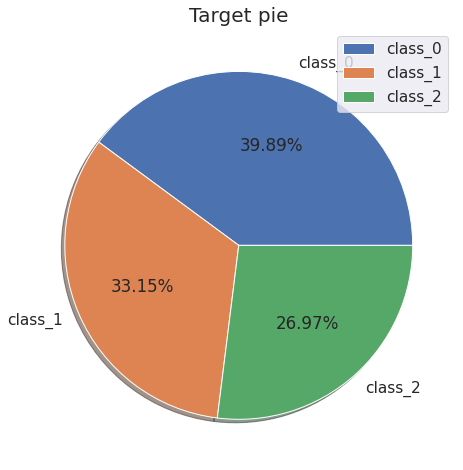

In [182]:
############################## target class 분포 확인 ##############################

labels = wine.target_names
size = wine_df['label'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(size, labels =labels, autopct = "%.2f%%", shadow = True)
plt.axis('off')
plt.title('Target pie', fontsize = 20)
plt.legend()



<div>
파이차트를 그려본 결과, 클래스의 분포가 균일한것을 알 수 있다. 데이터 분포가 불균형한 경우에는 과적합의 문제가 발생할 수 있어서 샘플링(Under Sampling, Over Sampling) 등의 방법을 이용하여 해결을 하지만, 현재의 경우에는 매우 균일하게 분포가 되어있어서 샘플링 과정은 생략하도록 한다.
</div>

#### **2-2-6. feature(독립변수) 확인&정제**

/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py

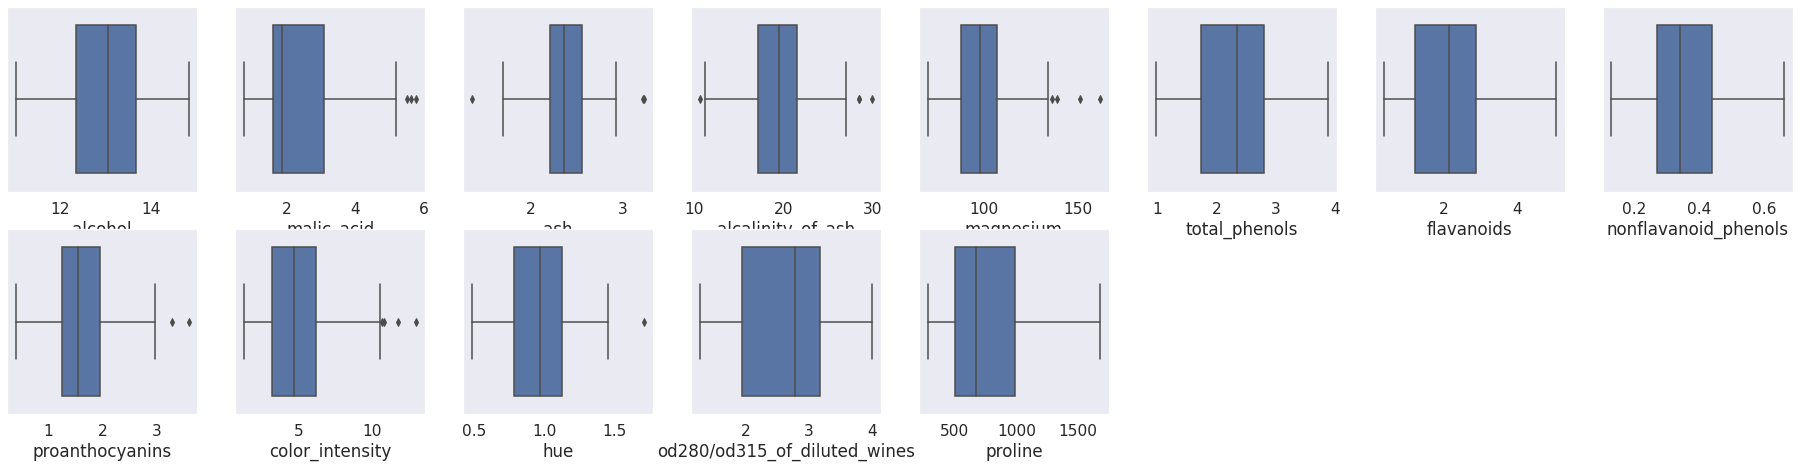

In [187]:
############################## 정규화 이전 feature scale확인 ##############################
warnings.simplefilter(action='ignore', category=FutureWarning) # FutureWarning 제거
plt.figure(figsize=(32, 32))
icount =1
for col in wine.feature_names:
    plt.subplot(8,8, icount)
    sns.boxplot(wine_df[col], orient="v")
    icount = icount+1
plt.show()

In [186]:
############################## 정제 전 feature 최대,최소 ##############################
min = wine_df.drop('label', axis=1).describe().T['min'].min()
max = wine_df.drop('label', axis=1).describe().T['max'].max()
print(f' *feature 최솟값 : {min}')
print(f' *feature 최댓값 : {max}')

 *feature 최솟값 : 0.13
 *feature 최댓값 : 1680.0


<div>
각 fature 별로 데이터스케일이 차이가 많이 나기에 데이터 정규화가 필요하다.

In [188]:
############################## 데이터 정규화 ##############################


minmax = MinMaxScaler()
wine_data_scaled = minmax.fit_transform(wine_data)
wine_df_scaled = pd.DataFrame(data=wine_data_scaled, columns=wine.feature_names)
wine_df_scaled['label'] =  wine.target
min_scaled = wine_df_scaled.drop('label', axis=1).describe().T['min'].min()
max_scaled = wine_df_scaled.drop('label', axis=1).describe().T['max'].max()
print(f' *feature 정규화 후 최솟값 : {min_scaled}')
print(f' *feature 정규화 후 최댓값 : {max_scaled}')

 *feature 정규화 후 최솟값 : 0.0
 *feature 정규화 후 최댓값 : 1.0


/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py

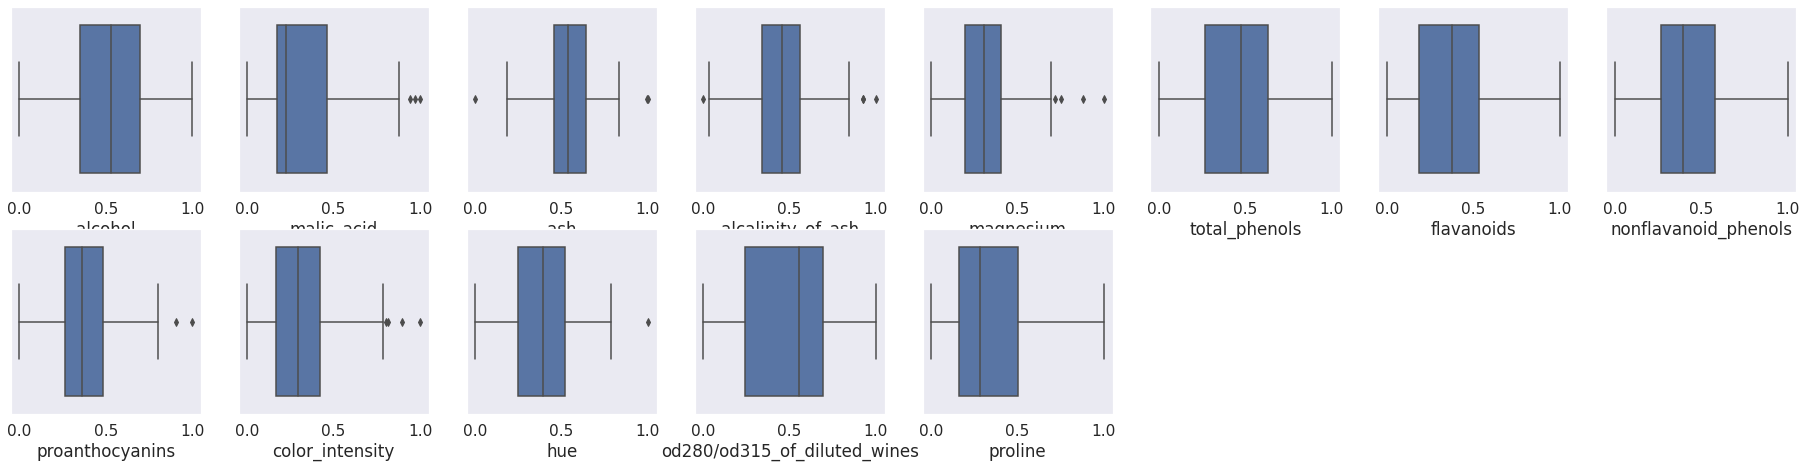

In [189]:
############################## 정규화 이후 feature scale확인 ##############################
warnings.simplefilter('always', category=UserWarning)
plt.figure(figsize=(32, 32))
icount =1
for col in wine_df_scaled.columns[:-1]:
    plt.subplot(8,8, icount)
    sns.boxplot(wine_df_scaled[col], orient="v")
    icount = icount+1
plt.show()

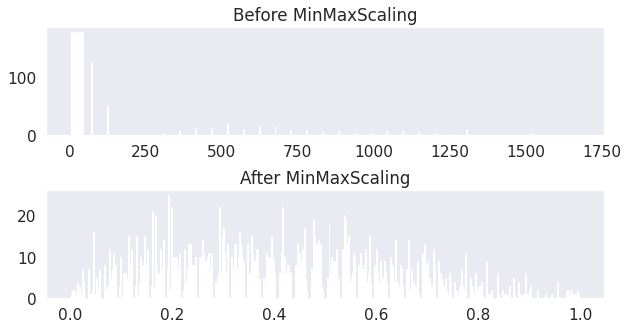

In [190]:
plt.figure(figsize=(10,5))
plt.subplot(2, 1, 1)
plt.hist(wine_data, bins=32)
plt.title('Before MinMaxScaling')
plt.subplot(2, 1, 2)
plt.hist(wine_data_scaled, bins=32)
plt.title('After MinMaxScaling')
plt.subplots_adjust(hspace=0.5)


<div>
독립변수들이 가지는 데이터의 상대적 크기 차이를 없애기 위해서 정규화 과정을 진행하도록 한다. 정규화는 feature를 0~1 사이 값으로 통일시켜줄때 사용을 하는 것인데, 이번에는 MinMaxScaling 을 활용하여 정규화시켜주었다.
</div>

### **2-4. 모델 구현 및 평가**
- 예측 모델 학습
- 모델 성능 개선
- 성능 평가
- 최종 모델 선정

#### **2-4-1. train/test 나누기**


In [195]:
############################## 학습데이터 나누기 & 교차검증 ##############################

X = wine_data_scaled
y = wine_label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)


#### **2-4-2. 모델 학습 및 예측**

In [196]:
############################## DecisionTreeClassifier 학습 ##############################
decision_tree = DecisionTreeClassifier(random_state=32)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       0.87      0.93      0.90        14
           2       0.89      0.89      0.89         9

    accuracy                           0.92        36
   macro avg       0.92      0.91      0.92        36
weighted avg       0.92      0.92      0.92        36



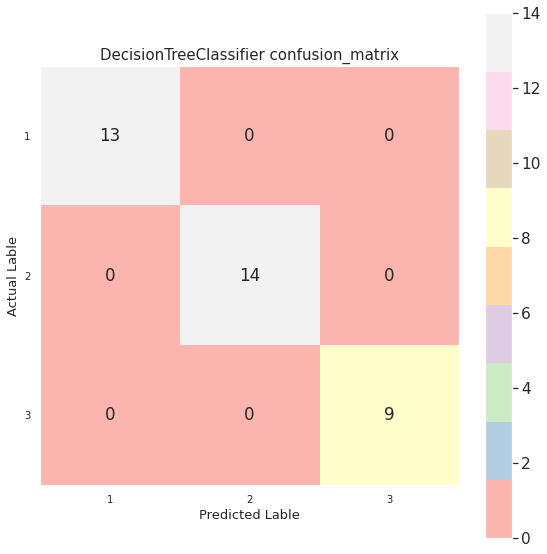

In [216]:
######################### DecisionTreeClassifier confusion_matrix #######################
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,8))
plt.imshow(cm, interpolation='nearest', cmap='Pastel1')
plt.title('DecisionTreeClassifier confusion_matrix', size=15)
plt.colorbar()
tick_marks = np.arange(3) 
plt.xticks(tick_marks,
           ["1","2","3"],
           size = 10)
plt.yticks(tick_marks,
           ["1","2","3"],
           size = 10)
plt.tight_layout()
plt.xlabel("Predicted Lable",size=13)
plt.ylabel("Actual Lable", size =13)
width, height = cm.shape

for x in range(width):
 for y in range(height):
    plt.annotate(str(cm[x][y]),xy=(y,x),
                horizontalalignment = 'center',
                verticalalignment = 'center')

  

In [198]:
############################## RandomForestClassifier ##############################
random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         9

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



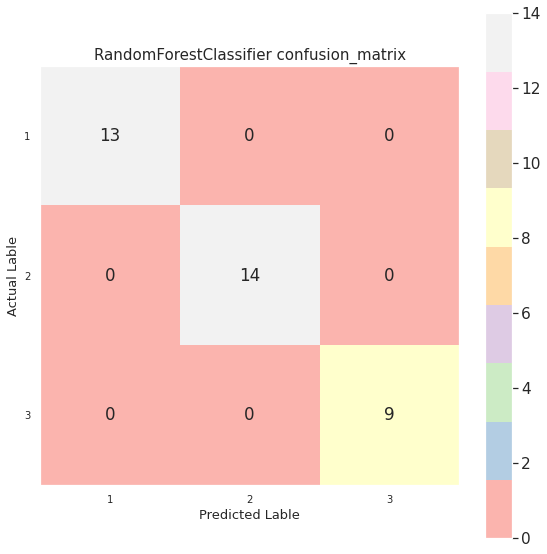

In [215]:
######################### RandomForestClassifier confusion_matrix #######################
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,8))
plt.imshow(cm, interpolation='nearest', cmap='Pastel1')
plt.title('RandomForestClassifier confusion_matrix', size=15)
plt.colorbar()
tick_marks = np.arange(3) 
plt.xticks(tick_marks,
           ["1","2","3"],
           size = 10)
plt.yticks(tick_marks,
           ["1","2","3"],
           size = 10)
plt.tight_layout()
plt.xlabel("Predicted Lable",size=13)
plt.ylabel("Actual Lable", size =13)
width, height = cm.shape

for x in range(width):
 for y in range(height):
    plt.annotate(str(cm[x][y]),xy=(y,x),
                horizontalalignment = 'center',
                verticalalignment = 'center')
  

In [200]:
############################## SupportVectorMachine ##############################
svc = svm.SVC(random_state=32)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.93      1.00      0.97        14
           2       1.00      0.89      0.94         9

    accuracy                           0.97        36
   macro avg       0.98      0.96      0.97        36
weighted avg       0.97      0.97      0.97        36



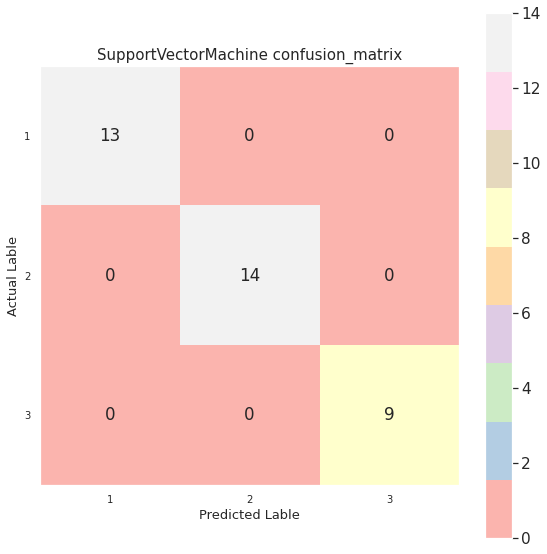

In [214]:
######################### SupportVectorMachine confusion_matrix #######################
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,8))
plt.imshow(cm, interpolation='nearest', cmap='Pastel1')
plt.title('SupportVectorMachine confusion_matrix', size=15)
plt.colorbar()
tick_marks = np.arange(3) 
plt.xticks(tick_marks,
           ["1","2","3"],
           size = 10)
plt.yticks(tick_marks,
           ["1","2","3"],
           size = 10)
plt.tight_layout()
plt.xlabel("Predicted Lable",size=13)
plt.ylabel("Actual Lable", size =13)
width, height = cm.shape

for x in range(width):
 for y in range(height):
    plt.annotate(str(cm[x][y]),xy=(y,x),
                horizontalalignment = 'center',
                verticalalignment = 'center')

  

In [202]:
############################## StochasticGradientDescent ##############################
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         9

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



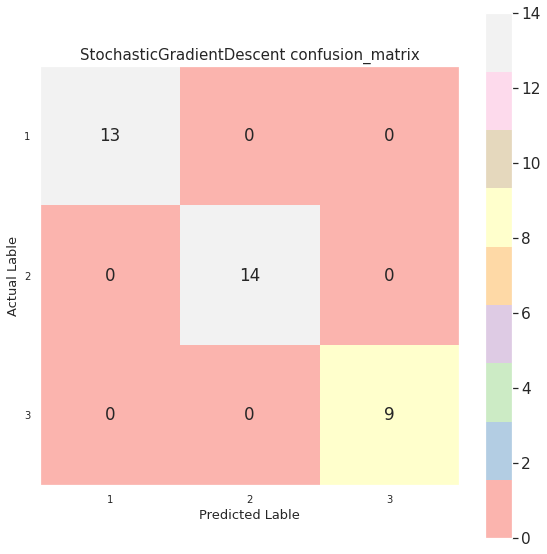

In [213]:
######################### StochasticGradientDescent confusion_matrix #######################
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,8))
plt.imshow(cm, interpolation='nearest', cmap='Pastel1')
plt.title('StochasticGradientDescent confusion_matrix', size=15)
plt.colorbar()
tick_marks = np.arange(3) 
plt.xticks(tick_marks,
           ["1","2","3"],
           size = 10)
plt.yticks(tick_marks,
           ["1","2","3"],
           size = 10)
plt.tight_layout()
plt.xlabel("Predicted Lable",size=13)
plt.ylabel("Actual Lable", size =13)
width, height = cm.shape

for x in range(width):
 for y in range(height):
    plt.annotate(str(cm[x][y]),xy=(y,x),
                horizontalalignment = 'center',
                verticalalignment = 'center')

  

In [204]:
############################## LogisticRegression ##############################
logit_reg = LogisticRegression(solver='liblinear')
logit_reg.fit(X_train, y_train)
y_pred = sgd.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         9

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



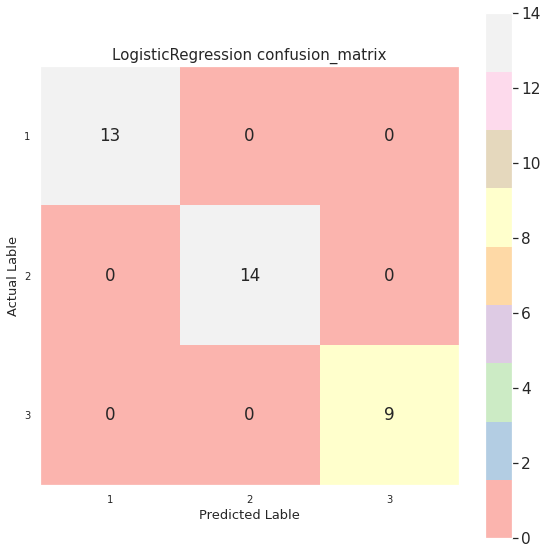

In [212]:
######################### LogisticRegression confusion_matrix #######################
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,8))
plt.imshow(cm, interpolation='nearest', cmap='Pastel1')
plt.title('LogisticRegression confusion_matrix', size=15)
plt.colorbar()
tick_marks = np.arange(3) 
plt.xticks(tick_marks,
           ["1","2","3"],
           size = 10)
plt.yticks(tick_marks,
           ["1","2","3"],
           size = 10)
plt.tight_layout()
plt.xlabel("Predicted Lable",size=13)
plt.ylabel("Actual Lable", size =13)
width, height = cm.shape

for x in range(width):
 for y in range(height):
    plt.annotate(str(cm[x][y]),xy=(y,x),
                horizontalalignment = 'center',
                verticalalignment = 'center')


  

In [206]:
############################## DecisionTreeClassifier 학습 ##############################
decision_tree = DecisionTreeClassifier(random_state=32)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       0.87      0.93      0.90        14
           2       0.89      0.89      0.89         9

    accuracy                           0.92        36
   macro avg       0.92      0.91      0.92        36
weighted avg       0.92      0.92      0.92        36



#### **2-4-3. 모델 성능 평가**

<div>
 해당 프로젝트는 와인의 등급을 잘못 판단하는 것 없이 정확하게 예측하는 것이 중요하다. 즉 낮은 등급을 높은 등급으로 판단하지않아야하기에 성능평가지표로는 recall,precision  모두 고려하는 `f1-score`가 적합하다고 생각한다.



<br>
평가지표를 정확도로 본다면 `RandomForestClassifier` 와 `SVM` 이 정확도  가 성능이 제일 좋다. 
</div>